<a href="https://colab.research.google.com/github/Charty042/PRACTISE-TRAINING/blob/main/Copy_of_Capstone_health_care.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
health_care = pd.read_csv(r'C:\3MTT TRAINING\CAPSTONE PROJECT\healthcare_dataset cleaned data.csv') #importing file into pandas

In [ ]:
#To display the first 5 rows of my data
#I just wanted to confirm that the cleaning I did on the column 'Name' using excel actually worked

health_care.head ()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results
0,Aaron Adams,30,Male,B-,Cancer,31/01/2024,Matthew Smith,Sons and Miller,Blue Cross,18856.28131,Urgent,02/02/2024,Paracetamol,Normal
1,Aaron Aguirre,62,Male,A+,Obesity,20/08/2019,Samantha Davies,Kim Inc,Medicare,33643.32729,Emergency,26/08/2019,Ibuprofen,Inconclusive
2,Aaron Anderson,76,Female,A-,Obesity,22/09/2022,Tiffany Mitchell,Cook PLC,Aetna,27955.09608,Emergency,07/10/2022,Aspirin,Normal
3,Aaron Anderson Md,28,Female,O+,Diabetes,18/11/2020,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.78241,Elective,18/12/2020,Ibuprofen,Abnormal
4,Aaron Archer,43,Female,AB+,Cancer,19/09/2022,Kathleen Hanna,White-White,Aetna,14238.31781,Urgent,09/10/2022,Penicillin,Abnormal


In [ ]:
health_care.isnull().sum() #to display any blank cells

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

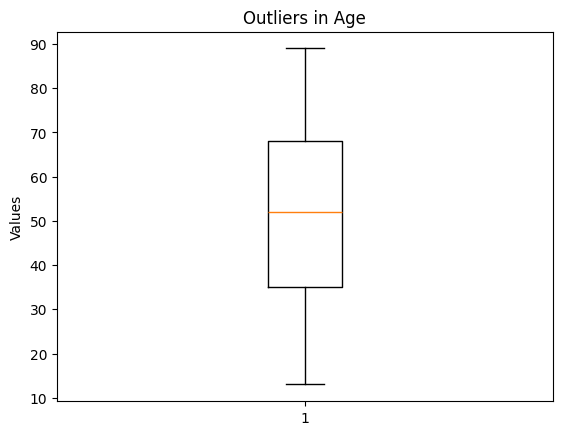

In [ ]:
#checking for outliers from the Age column
#Outliers here could indicate data entry mistakes (e.g., age values like 150) or perhaps patients whose ages are far outside the norm.

plt.boxplot(health_care['Age'])
plt.title('Outliers in Age')
plt.ylabel('Values')
plt.show() #from the results, it shows no significant outliers available

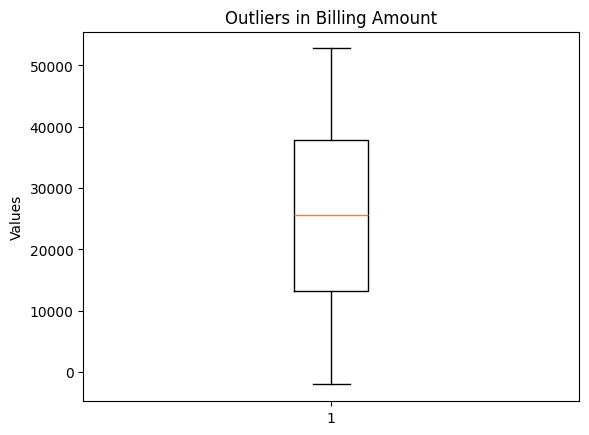

In [ ]:
#checking for outliers in the column 'Billing Amount'
#As it might reveal unusually high or low charges that could skew average billing analysis or indicate exceptional cases.

plt.boxplot(health_care['Billing Amount'])
plt.title('Outliers in Billing Amount')
plt.ylabel('Values')
plt.show() #from the results, it shows no significant outliers available

In [ ]:
#descriptive statistics to get an overview of numeric columns

health_care.describe()

,Age,Billing Amount
count,55500.000000,55500.000000
mean,51.539459,25539.316097
std,19.602454,14211.454431
min,13.000000,-2008.492140
25%,35.000000,13241.224655
50%,52.000000,25538.069380
75%,68.000000,37820.508432
max,89.000000,52764.276740


In [ ]:
# Most common diagnoses across all patients
#This will give you a count of each diagnosis, allowing you to see the most frequent conditions in the dataset.

common_diagnoses = health_care['Medical Condition'].value_counts()
common_diagnoses

Medical Condition
Arthritis       9308
Diabetes        9304
Hypertension    9245
Obesity         9231
Cancer          9227
Asthma          9185
Name: count, dtype: int64

In [ ]:
#What are the Test Result of the various Medication?
#converting our strings to numeric values

result_mapping = { 'Normal': 1, 'Abnormal': 0, 'Inconclusive': -1 }
health_care['Test Results'] = health_care['Test Results'].map(result_mapping)

In [ ]:
print(health_care['Test Results'].dtype) # Should be numeric type now (e.g., int64 or float64)
print(health_care['Test Results'].isnull().sum()) # Check for any NaN values introduced during mapping

int64
0


In [ ]:
treatment_success = health_care.groupby('Medication')['Test Results'].mean() * 100
print(treatment_success)

Medication
Aspirin        1.027582
Ibuprofen      0.808843
Lipitor       -0.529623
Paracetamol   -0.252913
Penicillin     0.397542
Name: Test Results, dtype: float64


In [ ]:
#What are the demographics (Age, Gender) of patients with specific Medical Conditions?
# Grouping by Medical condition and calculating the average age
avg_age = health_care.groupby('Medical Condition')['Age'].mean()

# Grouping by health condition and counting gender occurrences
gender_distribution = health_care.groupby('Medical Condition')['Gender'].value_counts().unstack().fillna(0)

print("Average Age per Medical Condition:\n", avg_age)
print("\nGender Distribution per Medical Condition:\n", gender_distribution)

Average Age per Medical Condition:
 Medical Condition
Arthritis       51.565320
Asthma          51.575830
Cancer          51.558795
Diabetes        51.554170
Hypertension    51.741915
Obesity         51.240277
Name: Age, dtype: float64

Gender Distribution per Medical Condition:
 Gender             Female  Male
Medical Condition              
Arthritis            4686  4622
Asthma               4553  4632
Cancer               4602  4625
Diabetes             4651  4653
Hypertension         4612  4633
Obesity              4622  4609
